# Olist's Metric Design 

In this challenge, we are going to catch a first glimpse into `Olist's business health`

In [2]:
# Import Modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data
from olist.data import Olist
data = Olist().get_data()

## Test your import!

In [4]:
from nbresult import ChallengeResult

result = ChallengeResult('orders',
    keys_len=len(data),
    key_names=sorted(list(data.keys())),
    reviews_number=len(data['order_reviews'])
)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/04-Decision-Science/01-Project-Setup/Optional-Metric-Design
plugins: anyio-3.4.0
collecting ... collected 3 items

tests/test_orders.py::TestOrders::test_key_names PASSED                  [ 33%]
tests/test_orders.py::TestOrders::test_keys_len PASSED                   [ 66%]
tests/test_orders.py::TestOrders::test_reviews_number PASSED             [100%]

============================== 3 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/orders.pickle

git commit -m 'Completed orders step'

git push origin master


## 1 - Orders vs. Reviews?

❓Plot a histogram of `review_score`. 

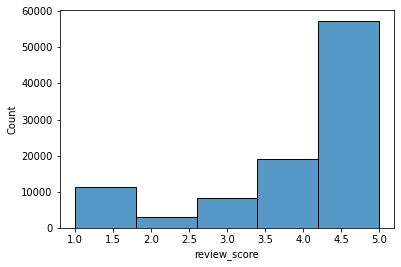

In [27]:
# YOUR CODE HERE
sns.histplot(data['order_reviews']['review_score'], bins =5);

❓ Plot a histogram of `order_status` <br/>

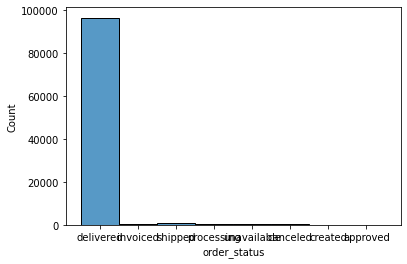

In [30]:
# YOUR CODE HERE
sns.histplot(data['orders']['order_status']);

❓ How many of them are delivered ? shipped ? canceled ? ...

In [ ]:
# YOUR CODE HERE

💡 We already know - from our data schema - that each `review` has a unique `order`.

🤔 Do all `orders` have a `review`?

<details>
    <summary><i>▸ Hint</i></summary>

You can use `pd.Series.isna().sum()` to count the number of NaN values in a series
</details>

In [ ]:
# YOUR CODE HERE

If some orders were not reviewed, count and group them per `order_status`.

In [ ]:
# YOUR CODE HERE

## 2 - Evolution of key business metrics over the past 14 months

## Metrics 

1. Which metric would you use as a `key business output metric`for Olist  📈 ? 
2.  Which metric would you use to measure that a customer had a `good experience with Olist` 🙂 ? 
3. Which metric would you use to measure `shipping delay` 🕗?

For each metric, plot a trend line over time.

### Metric 1: Order numbers

❓ Plot the weekly number of total orders per week (to check how business is going)  


In [ ]:
# YOUR CODE HERE

❓ Visualize the weekly number of non-delivered orders (to check for any potential issues)

<details>
    <summary><i>▸ Hint </i></summary>    
    
* Convert dates to Python `datetime` objects  
* You can use the built-in `pandas.Series.resample() tool from `pandas` to group your dataset by weeks
    
</details>

In [ ]:
# YOUR CODE HERE

### Metric 1-bis (optional): Total payment values
❓ After plotting the total number of orders, we could also have a look at the weekly sum of `payment_value` in `BRL` to approximate Olist's weekly revenues.

In [ ]:
# YOUR CODE HERE

💡 Merge the `payments` dataset with the `orders` dataset to collect the date of each payment.

In [ ]:
# YOUR CODE HERE

⌛️ Once again, do not forget to handle datetimes properly

In [ ]:
# YOUR CODE HERE

📈 Visualize the number of orders and total amount of payments per week

In [ ]:
# YOUR CODE HERE

📈 *(Optional)* Plot the weekly number of orders and payments again with techniques you learned during the `Data Visualization` module :)

In [ ]:
# YOUR CODE HERE

### Metric 2: Customer Satisfaction
❓ How does the `customer satisfaction` evolve on a monthly basis ? Use the mean average `review_score` to illustrate the customer satisfaction.

👉 Load the `reviews` :

In [ ]:
# YOUR CODE HERE

⌛️ If you need to handle datetime, do it.

In [ ]:
# YOUR CODE HERE

📉 Plot the customer satisfaction evolution over time

In [ ]:
# YOUR CODE HERE

📉 *(Optional)* Plot the customer satisfaction evolution over time again with techniques you learned during the Data Visualization module :)

In [ ]:
# YOUR CODE HERE

### Metric 3: Shipping delay

❓Create two new metrics, `delay_vs_expected` and `wait_time` in ***days***, from the `orders` dataset, and plot their historical evolution on a weekly basis to detect trends

<details>
    <summary>▸ <i>Hint</i></summary>

    
Ask `StackOverflow` to help you compute differences between `datetime`s in Python!
</details>

🛒 Let's focus on delivered orders so that we can compute the shipping delays:

In [ ]:
# YOUR CODE HERE

⌛️ Datetime problems again ? Fix them ;)

In [ ]:
# YOUR CODE HERE

👉 Compute the delay between the actual delivery date and the ETA for each order.

In [ ]:
# YOUR CODE HERE

👉 Compute the waiting time between the actual delivery date and the moment a customer ordered their items

In [ ]:
# YOUR CODE HERE

⌛️ How many orders were delivered later than expected ? <br/>
*You can also give an answer in terms of percentage if you prefer.*
<details>
    <summary><i>▸ Hint </i></summary>

    
You can create a `boolean_feature` which is :
* True when actual_delivered_date > ETA $\leftrightarrow$ actual_delivered_date - ETA > 0
* False otherwise
    
</details>




In [ ]:
# YOUR CODE HERE

* On average, 8% of the orders are delivered after the ETA ⌛️

* Let's find which weeks were the worst 👇
    1. Aggregate the dataset per week
    2. Compute the percentage of orders delivered lately each week

In [ ]:
# YOUR CODE HERE

📈 Plot the `number of delays` and `percentage of delayed orders` per week

In [ ]:
# YOUR CODE HERE

#### Delay Analysis

📈 📉 From the previous graph, Olist experienced major lateness issues on 3-4 weeks ⚠️...

👉 Let's deep dive into these peaks of lateness.

❓ Create a dataframe (with weeks as indexes ) with the following columns:
* number of delays
* number of orders
* percentage of delayed orders

In [ ]:
# YOUR CODE HERE

❓ Create sub-dataframes to seperate these weeks into subgroups.

A suggestion:
- 20% and more
- 15-20%
- 10-15%
- 5-10%
- 5% and less